# importing modules

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# reading from the vgsales.csv dataset

In [4]:
df=pd.read_csv("vgsales.csv")
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#lets have a look on how many columns the dataset has
columns=df.columns
for column in columns:
    print(column)

Rank
Name
Platform
Year
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


In [7]:
#i wish to drop all columns with underscore(_) as a character in the column name
#start by creating a  list for storing the target columns after sorting them from the other columns
target_columns=[]
#looping through the columns , find the target columns and append them to the target_columns list
for column in columns:
    if "_" in column:
        print(column)
        #appending them 
        target_columns.append(column)

NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


In [8]:
#lets see whether the columns have been succesfuly appended into the target list
print(target_columns)

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [11]:
#since the process have succeded , lets drop the columns
df2=df.drop(target_columns,axis=1)
#lets see several columns of the new dataframe
df2.head()


,Rank,Name,Platform,Year,Genre,Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo


In [12]:
#saving the new dataframe as an excel file ,then do some data analysis
save_as="video games.xlsx"
df2.to_excel(save_as,index=False)

# Let's try doing some data analysis

In [14]:
#using the new dataframe with fewer columns
data=pd.read_excel("video games.xlsx")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo


# Answering questions arising from the dataset

# 1:How many movies were published in the year 2003

In [41]:
games_2003=0
movies_names=[]
for i in range(len(data)):
    if data.loc[i].Year==2003.0:
        #print(data.loc[i].Name)
        movies_names.append(data.loc[i].Name)
        games_2003+=1
if games_2003==1:
    print(f"{games_2003} movie was published in the year {data.loc[i].Year}")
else:
    print(f"{games_2003} movies were published in the year {data.loc[i].Year} ")
    
#print(len(movies_names))

775 movies were published in the year 2003.0 


# 2:Generate a report about each genre and the total number of video games in the genre, Then save the report in a file  named "genre_video_games.txt"

In [55]:
genres=data['Genre'].unique()
total_games=0
genre_games_list=[]
for genre in genres:
    genre_games=genre+"_games"
    genre_games=0
    for i in range(len(data)):
        if data.loc[i].Genre==genre:
            genre_games+=1
    print(f"{genre} Genre has {genre_games} games")
    genre_games_list.append(genre_games)
    #creating the report text file
    with open("genre_video_games.txt",'a') as myfile:
        myfile.write(f"{genre} Genre has {genre_games} games\n")
        myfile.close()
    total_games+=genre_games
print("\n**********************************************")
print(f"All video games add up to :{total_games} games")

Sports Genre has 2346 games
Platform Genre has 886 games
Racing Genre has 1249 games
Role-Playing Genre has 1488 games
Puzzle Genre has 582 games
Misc Genre has 1739 games
Shooter Genre has 1310 games
Simulation Genre has 867 games
Action Genre has 3316 games
Fighting Genre has 848 games
Adventure Genre has 1286 games
Strategy Genre has 681 games

**********************************************
All video games add up to :16598 games


In [52]:
##confirming whether the report has been saved succesfull
with open("genre_video_games.txt",'r') as report:
    lines=report.readlines()
    for line  in lines:
        print(line.strip("\n"))

Sports Genre has 2346 games
Platform Genre has 886 games
Racing Genre has 1249 games
Role-Playing Genre has 1488 games
Puzzle Genre has 582 games
Misc Genre has 1739 games
Shooter Genre has 1310 games
Simulation Genre has 867 games
Action Genre has 3316 games
Fighting Genre has 848 games
Adventure Genre has 1286 games
Strategy Genre has 681 games


# 3:Plot a pie chart  for the genres and the video games in each genre

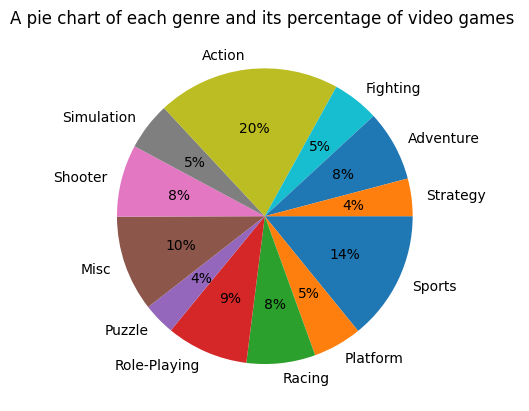

In [60]:
labels=[]
for genre in genres:
    labels.append(genre)
sizes=genre_games_list
plt.title("A pie chart of each genre and its percentage of video games ")
plt.pie(sizes,labels=labels,autopct='%1.f%%',counterclock=False)
plt.show()